### 1 Dataset Sizes

##### General vs Scientific datasets
Size:
- General: no. samples ~ 0.01m-1m
- Scientific: no. samples ~ 1m-100m

Storage:
- General: 0.1-10 GB
- Scientific: 1-100 GB

Shape (and dimensions):
- General: 2D (images, text, tabular)
- Scientific: 3D-5D (spatial, temporal, spectral)

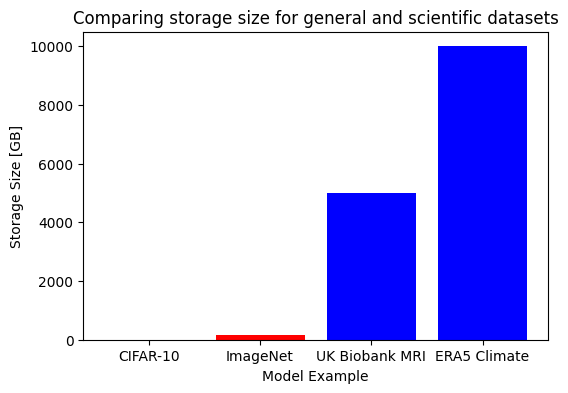

In [426]:
import matplotlib.pyplot as plt
import pandas as pd

dataset_data = {
    'example': ['CIFAR-10', 'ImageNet', 'UK Biobank MRI', 'ERA5 Climate'],
    'size': [0.17, 150, 5000, 10000],
    'type': ['general', 'general', 'scientific', 'scientific']
}

compare_df = pd.DataFrame(dataset_data)
colours = ['r' if x=='general' else 'b' for x in compare_df['type']]
plt.figure(figsize=(6,4))
plt.bar(compare_df['example'], compare_df['size'], color=colours)
plt.xlabel('Model Example')
plt.ylabel('Storage Size [GB]')
plt.title('Comparing storage size for general and scientific datasets')
plt.show()

### 2 Bias vs Variance trade-off

- Number of data points vs Error
- Model complexity vs Error

Perform an experiment with polynomials which shows this behaviour.

In [ ]:
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

##### No. Data Points vs Error

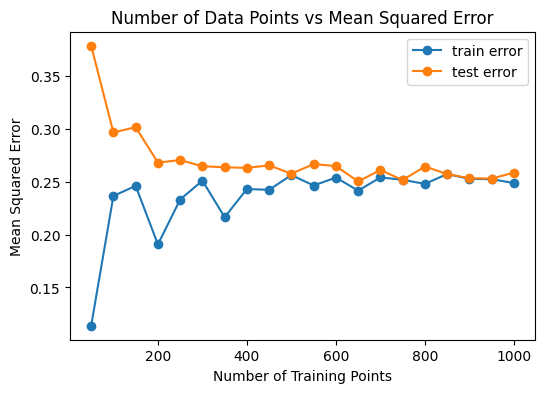

In [425]:
data_points = range(50,1050,50)
poly_degree = 20
dp_train_errors = []
dp_test_errors = []

# testing data
test_points = 500
x_test = np.random.random(test_points)
x_test_re = x_test.reshape(-1,1)
s_test = 0.5*np.random.randn(test_points)
y_test = 5*x_test**2 + 2*x_test + s_test

np.random.seed(280400)
for no_points in data_points:
    # training data
    train_points = no_points
    x_train = np.linspace(0, 1, train_points)
    x_train_re = x_train.reshape(-1,1)
    s = 0.5*np.random.randn(train_points)
    y_train = 5*x_train**2 + 2*x_train + s

    # model training
    poly = PolynomialFeatures(degree=poly_degree) # fixed degree
    x_poly = poly.fit_transform(x_train_re)
    clf = linear_model.LinearRegression()
    clf.fit(x_poly, y_train)
    
    # train error
    y_train_preds = clf.predict(x_poly)
    train_mse = np.mean((y_train - y_train_preds)**2)
    dp_train_errors.append(train_mse)
    
    # test error
    x_test_poly = poly.transform(x_test_re)
    y_test_preds = clf.predict(x_test_poly)
    test_mse = np.mean((y_test - y_test_preds)**2)
    dp_test_errors.append(test_mse)

# plotting
plt.figure(figsize=(6,4))
plt.plot(data_points, dp_train_errors, '-o', label='train error')
plt.plot(data_points, dp_test_errors, '-o', label='test error')
plt.xlabel('Number of Training Points')
plt.ylabel('Mean Squared Error')
plt.title('Number of Data Points vs Mean Squared Error')
plt.legend()
plt.show()

##### Model Complexity vs Error

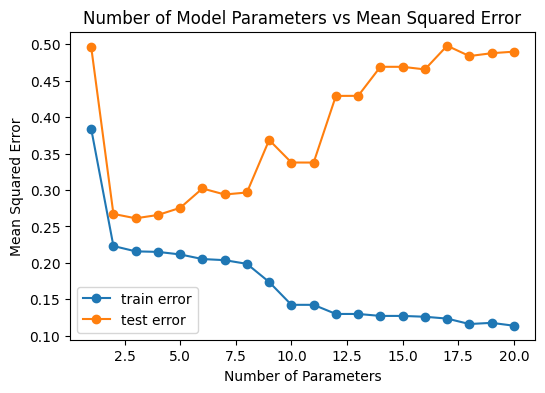

In [424]:
degrees = range(1,21)
mc_train_errors = []
mc_test_errors = []

# training data
np.random.seed(280400)
train_points = 50
x_train = np.linspace(0, 1, train_points)
x_train_re = x_train.reshape(-1,1)
s = 0.5*np.random.randn(train_points)
y_train = 5*x_train**2 + 2*x_train + s

# testing data
test_points = 10
x_test = np.random.random(test_points)
x_test_re = x_test.reshape(-1,1)
s_test = 0.5*np.random.randn(test_points)
y_test = 5*x_test**2 + 2*x_test + s_test

for degree in degrees:
    # model training
    poly = PolynomialFeatures(degree=degree)
    x_poly = poly.fit_transform(x_train_re)
    clf = linear_model.LinearRegression()
    clf.fit(x_poly, y_train)
    
    # train error
    y_train_preds = clf.predict(x_poly)
    train_mse = np.mean((y_train - y_train_preds)**2)
    mc_train_errors.append(train_mse)
    
    # test error
    x_test_poly = poly.transform(x_test_re)
    y_test_preds = clf.predict(x_test_poly)
    test_mse = np.mean((y_test - y_test_preds)**2)
    mc_test_errors.append(test_mse)

# plotting
plt.figure(figsize=(6,4))
plt.plot(degrees, mc_train_errors, '-o', label='train error')
plt.plot(degrees, mc_test_errors, '-o', label='test error')
plt.xlabel('Number of Parameters')
plt.ylabel('Mean Squared Error')
plt.title('Number of Model Parameters vs Mean Squared Error')
plt.legend()
plt.show()

### 3. Gradient Descent - Adam

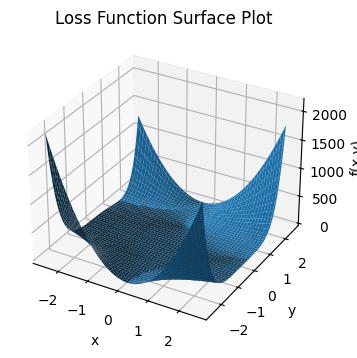

In [432]:
from mpl_toolkits.mplot3d import Axes3D

# plotting points
x_vals = np.linspace(-2.5,2.5,100)
y_vals = np.linspace(-2.5,2.5,100)
x, y = np.meshgrid(x_vals, y_vals)

# define loss function
def loss_func(x, y):
    return ((1.5 - x + x*y)**2) + ((2.25 - x + x*(y**2))**2) + (2.625 - x + x*(y**3))**2

# plotting
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, loss_func(x,y))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
plt.title('Loss Function Surface Plot')
plt.show()

In [275]:
# define loss func
def loss_func(x, y):
    return ((1.5 - x + x*y)**2) + ((2.25 - x + x*(y**2))**2) + (2.625 - x + x*(y**3))**2

# function vectorised
def loss_func_vec(x_vec):
    x = x_vec[0]
    y = x_vec[1]
    return loss_func(x, y)

# gradient calculator -> numerical gradient
def numerical_grad(func, x_vec, h=1e-5):
    # init grad vector
    grad = np.zeros_like(x_vec)
    
    # implement numerical grad
    for i in range(len(x_vec)):
        x_h = x_vec.copy()
        x_h[i] += h
        grad[i] = (func(x_h) - func(x_vec)) / h
    return grad

In [276]:
# adam optimiser function
def adam_opt(loss_func, num_steps, theta_0, eta, m0, s0, beta1, beta2, epsilon):
    # history lists
    theta_history = []
    loss_history = []
    
    # current params
    theta_current = theta_0.copy()
    m_t = m0.copy()
    s_t = s0.copy()
    
    # iterate over number of steps
    for t in range(1, num_steps+1):
        # 1. compute gradients of f(x,y)
        g_t = numerical_grad(loss_func, theta_current)
        
        # 2. update first moment and second moment
        m_t = beta1*m_t + (1-beta1)*g_t
        s_t = beta2*s_t + (1-beta2)*(g_t**2)
        
        # 3. bias correction
        m_t_hat = m_t / (1-(beta1)**t)
        s_t_hat = s_t / (1-(beta2)**t)
        
        # 4. update params
        theta_current = theta_current - eta*(m_t_hat/((np.sqrt(s_t_hat)) + epsilon))
        
        # 5. store theta and loss
        theta_history.append(theta_current.copy())
        loss_history.append(loss_func(theta_current))
    
    return theta_history, loss_history

##### Testing pair of theta and eta

In [539]:
# initialise variables
theta_1 = np.array([1.0, 1.5])  # first starting point
theta_2 = np.array([2.5, -1.5]) # second starting point
eta_1 = 10e-3                   # first learning rate
eta_2 = 10e-4                   # second learning rate

m_0 = np.array([0.0, 0.0])      # first moment vector
s_0 = np.array([0.0, 0.0])      # second moment vector
beta_1 = 0.9                    # decay for first moment
beta_2 = 0.99                   # decay for second moment
epsilon = 10e-8                 # constant to avoid zero div
steps = 1000                    # number of adam iterations

In [540]:
first_set = adam_opt(loss_func_vec,
                     steps,
                     theta_1,
                     eta_1,
                     m_0,
                     s_0,
                     beta_1,
                     beta_2,
                     epsilon
                     )
second_set = adam_opt(loss_func_vec,
                      steps,
                      theta_2,
                      eta_2,
                      m_0,
                      s_0,
                      beta_1,
                      beta_2,
                      epsilon
                      )

In [558]:
# convert history to arrays for easy indexing
final_theta1 = np.array(first_set[0])[-1]
final_theta2 = np.array(second_set[0])[-1]

print("True theta_min: [3.0, 0.5]")
print("Final theta_1:", final_theta1)
print("Final theta_2:", final_theta2)

True theta_min: [3.0, 0.5]
Final theta_1: [2.99361894 0.49838897]
Final theta_2: [ 1.76232832 -0.78509024]


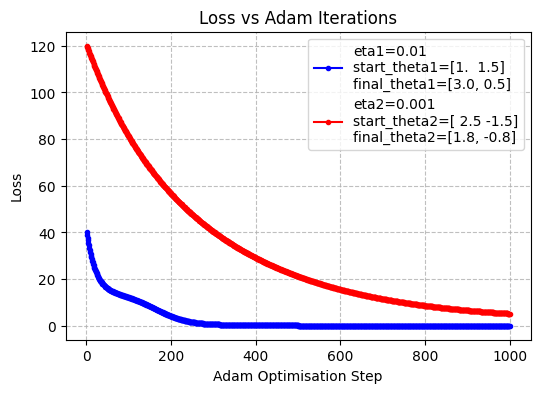

In [564]:
# plot adam optimiser loss
plt.figure(figsize=(6,4))
plt.plot(range(1, len(first_set[1])+1), first_set[1], color='b', marker='.', label=f'eta1={eta_1}\nstart_theta1={theta_1}\nfinal_theta1=[{final_theta1[0]:.1f}, {final_theta1[1]:.1f}]')
plt.plot(range(1, len(second_set[1])+1), second_set[1], color='r', marker='.', label=f'eta2={eta_2}\nstart_theta2={theta_2}\nfinal_theta2=[{final_theta2[0]:.1f}, {final_theta2[1]:.1f}]')
plt.ylabel('Loss')
plt.xlabel('Adam Optimisation Step')
plt.title('Loss vs Adam Iterations')
plt.legend()
plt.grid(True, ls='--', alpha=0.8)
plt.show()

##### Testing range of theta

In [535]:
# grid of theta starting points
x_vals = np.linspace(-4,4,10)
y_vals = np.linspace(-4,4,10)
theta_starts = np.column_stack((x_vals, y_vals))

In [536]:
# initialise variables
eta = 10e-3                     # fixed learning rate
m_0 = np.array([0.0, 0.0])      # first moment vector
s_0 = np.array([0.0, 0.0])      # second moment vector
beta_1 = 0.9                    # decay for first moment
beta_2 = 0.99                   # decay for second moment
epsilon = 10e-8                 # constant to avoid zero div
steps = 1000                    # number of adam iterations

In [573]:
final_thetas = []
for theta0 in theta_starts:
    theta_history, _ = adam_opt(loss_func_vec,
                                steps,
                                theta0,
                                eta,
                                m_0,
                                s_0,
                                beta_1,
                                beta_2,
                                epsilon
                                )
    final_thetas.append(theta_history[-1])
final_points = np.array(final_thetas)
for i in range(len(final_points)):
    print(f'Final theta {i+1}: {final_points[i]}')

Final theta 1: [-0.87412748 -1.33456508]
Final theta 2: [ 0.25561109 -1.12216597]
Final theta 3: [ 1.59459931 -0.35446357]
Final theta 4: [2.84985411 0.46015713]
Final theta 5: [2.99046619 0.49758436]
Final theta 6: [2.9997749  0.49993918]
Final theta 7: [2.99973511 0.4999291 ]
Final theta 8: [2.5010141  0.33493922]
Final theta 9: [1.54964499 0.61701348]
Final theta 10: [1.45944384 1.23403238]


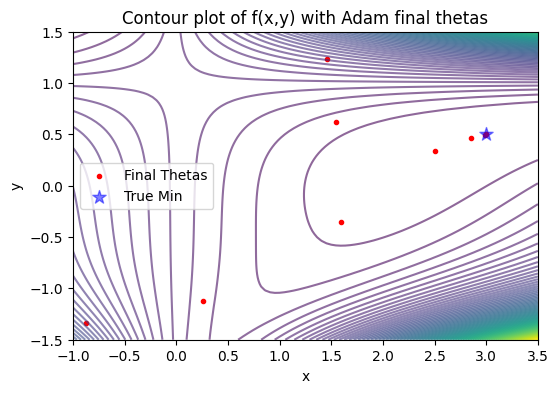

In [538]:
x_vals = np.linspace(-1, 3.5, 100)
y_vals = np.linspace(-1.5, 1.5, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = loss_func_vec([X, Y])

plt.figure(figsize=(6,4))
contours = plt.contour(X, Y, Z, levels=100, alpha=0.6)
plt.scatter(final_points[:,0], final_points[:,1], color='red', marker='.', label='Final Thetas')
plt.scatter(3.0, 0.5, color='b', marker='*', s=100, alpha=0.5, label='True Min')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour plot of f(x,y) with Adam final thetas')
plt.legend(loc='center left')
plt.show()

Most starting points converge to the true minimum at (3.0, 0.5) with points starting closer converging faster in fewer iterations. Points starting further away take longer to converge and in some cases do not converge as they may be stuck in a local minima.

### 4. Fun in high dimensions